# 3ML with Fermi GBM TTE  and LAT LLE Data
### Purpose

This demonstrates of you can use LLE data directly in 3ML

For more detail on the Fermi TTE plugin, check out its demo.

#### Let's check it out!

Import **3ML** as always to make sure you have the plugin

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
from threeML import *

get_available_plugins()

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
FermiLATLLELike for Fermi LAT LLE
OGIPLike for All OGIP-compliant instruments
EventListLike for Generic EventList data
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS


In [2]:
# os.path.join is a way to generate system-independent
# paths (good for unix, windows, Mac...)
trigger_number = 'bn080916009'

data_dir_gbm = os.path.join('gbm',trigger_number)
download_GBM_trigger_data(trigger_number,detectors=['n3','n4','b0'],destination_directory=data_dir_gbm,compress_tte=True)


data_dir_lle = os.path.join('lat','lle',trigger_number)

download_LLE_trigger_data(trigger=trigger_number,destination_directory=data_dir_lle)

src_selection = "0.-71."


# We start out with a bad background interval to demonstrate a few features

nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(data_dir_gbm, "glg_tte_n3_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n3_bn080916009_v00.rsp2"),poly_order=-1,verbose=False)

nai4 = FermiGBMTTELike('NAI4',
                         os.path.join(data_dir_gbm, "glg_tte_n4_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n4_bn080916009_v00.rsp2"),poly_order=-1,verbose=False)

bgo0 = FermiGBMTTELike('BGO0',
                         os.path.join(data_dir_gbm, "glg_tte_b0_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_b0_bn080916009_v00.rsp2"))


lle = FermiLATLLELike("LLE",
                      os.path.join(data_dir_lle, "gll_lle_bn080916009_v10.fit"),
                      os.path.join(data_dir_lle, "gll_pt_bn080916009_v10.fit"),
                      "-100-0,100-200",
                      src_selection,
                      rsp_file=os.path.join(data_dir_lle, "gll_cspec_bn080916009_v10.rsp"),poly_order=-1)

glg_cspec_n3_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
glg_cspec_n4_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
glg_cspec_b0_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
glg_tte_n3_bn080916009_v01.fit.gz already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
glg_tte_n4_bn080916009_v01.fit.gz already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
glg_tte_b0_bn080916009_v01.fit.gz already downloaded into /Users/jburgess/coding/3ML/examples/gbm/bn080916009 -> skipping
gll_cspec_bn080916009_v10.rsp already downloaded into /Users/jburgess/coding/3ML/examples/lat/lle/bn080916009 -> skipping
gll_lle_bn080916009_v10.fit already downloaded into /Users/jburgess/coding/3ML/examples/lat/lle/bn080916009 -> skipping
gll_pt_bn080916009_v10.fit


WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1


WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future



Auto-determined polynomial order: 1


Unbinned 1-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-determined polynomial order: 1


Binned 1-order polynomial fit with the Powell method


Auto-probed noise models:
- observation: poisson
- background: gaussian


In [3]:
lle.peek()

LLE File Info:


Active Count Error                                  12.2941
Active Counts                                          1821
Active Deadtime                                      5.3301
Active Exposure                                     65.6699
Active Polynomial Counts                            394.438
Active Selections                             [(0.0, 71.0)]
Number of Channels                                       50
Poly fit method                                      Powell
Poly fit type                                        Binned
Polynomial Order                                          1
Polynomial Selections       [[-100.0, 0.0], [100.0, 200.0]]
Significance                                 [42.905261499]
Total N. Events                                       11230
dtype: object

Timing Info:



WARNING UserWarning: You do not have the requests library, cannot get time system from Heasarc at this point.



Fermi MET OBS Start                 2.43216e+08
Fermi MET OBS Stop                  2.43218e+08
Fermi Trigger Time                  2.43217e+08
Fermi UTC OBS Start    2008-09-15T23:56:05.6130
Fermi UTC OBS Stop     2008-09-16T00:29:25.6129
dtype: object

Let's look at the lightcurve of NAI3 to check out background fit:

<IPython.core.display.Javascript object>


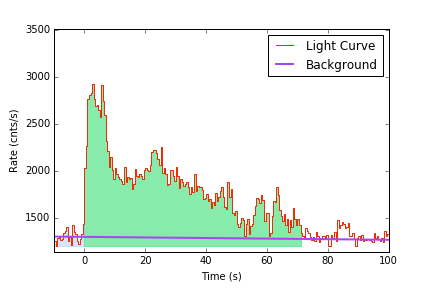

In [4]:
nai3.view_lightcurve(-10,100.,.5)

<IPython.core.display.Javascript object>


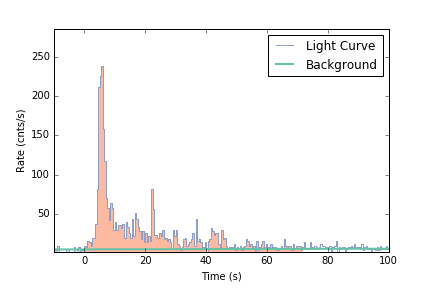

In [5]:
lle.view_lightcurve(-10,100,dt=.5)

### Energy selection



<IPython.core.display.Javascript object>


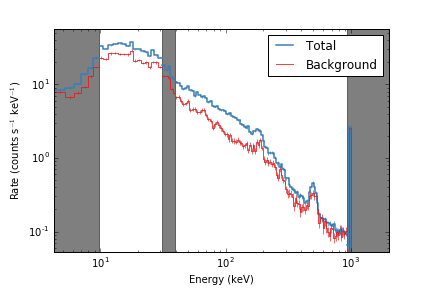

In [6]:
nai3.set_active_measurements("10.0-30.0", "40.0-900.0")
nai3.view_count_spectrum()

<IPython.core.display.Javascript object>


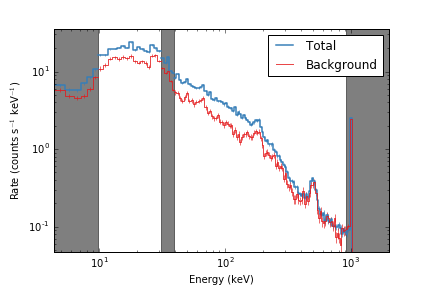

In [7]:
nai4.set_active_measurements("10.0-30.0", "40.0-900.0")
nai4.view_count_spectrum()

Range 250-43000 translates to channels 1-126
Now using 126 channels out of 128


<IPython.core.display.Javascript object>


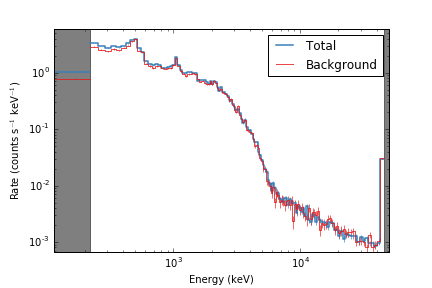

In [8]:
bgo0.set_active_measurements("250-43000")
bgo0.view_count_spectrum()

Range 50000-100000 translates to channels 11-16
Now using 6 channels out of 50


<IPython.core.display.Javascript object>


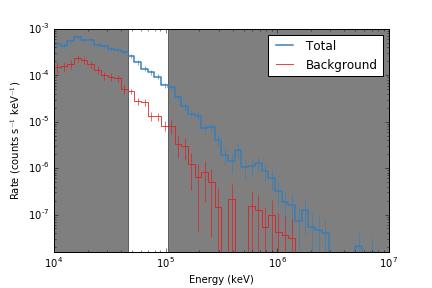

In [9]:
lle.set_active_measurements("50000-100000")
lle.view_count_spectrum()

## Fitting!

We are now ready for the standard **3ML** process:


In [10]:

ra = 121.8
dec = -61.3

data_list = DataList(nai3,nai4,bgo0,lle )

band= Band()

GRB = PointSource( trigger_number, ra, dec, spectral_shape=band )

model = Model( GRB )


In [11]:
jl = JointLikelihood( model, data_list, verbose=False )

res = jl.fit()

Best fit values:



,Best fit value,Unit
bn080916009.spectrum.main.Band.K,0.0149 +/- 0.0007,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.058 +/- 0.033,
bn080916009.spectrum.main.Band.beta,-2.172 +/- 0.022,
bn080916009.spectrum.main.Band.xp,(5.1 +/- 0.6)e+02,keV



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.91,-0.96,0.72
0.91,1.00,-0.87,0.62
-0.96,-0.87,1.00,-0.81
0.72,0.62,-0.81,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,3322.748431
NAI3,1064.574796
NAI4,1030.174616
BGO0,1198.391008
LLE,29.608011


<IPython.core.display.Javascript object>


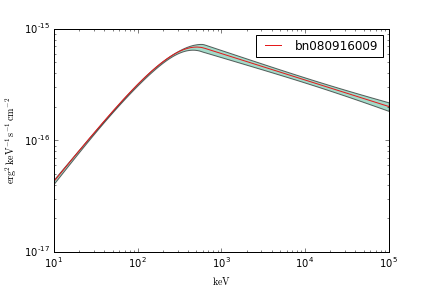

In [12]:
sp = SpectralPlotter(jl)

_=sp.plot_model(y_unit='erg2/(cm2 s keV)', num_ene=200,x_max=1E5)

We can examine our fit with the data:

<IPython.core.display.Javascript object>


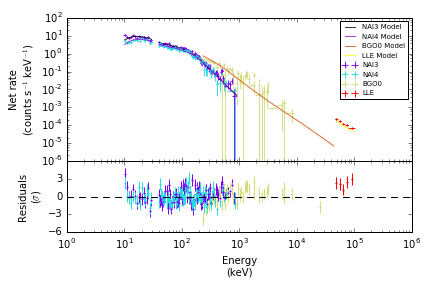

In [13]:
_ = display_ogip_model_counts(jl,min_rate=1,step=False)

In [14]:
res = jl.get_errors()

Name,Value,Unit
bn080916009.spectrum.main.Band.K,0.0149 -0.0006 +0.0007,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.058 -0.032 +0.034,
bn080916009.spectrum.main.Band.xp,(5.1 -0.6 +0.7)e+02,keV
bn080916009.spectrum.main.Band.beta,-2.172 -0.023 +0.021,


<IPython.core.display.Javascript object>


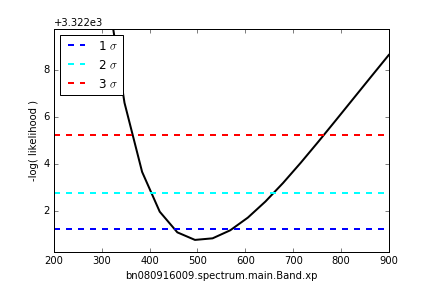

In [15]:
res = jl.get_contours(band.xp,200,900,20)

<IPython.core.display.Javascript object>


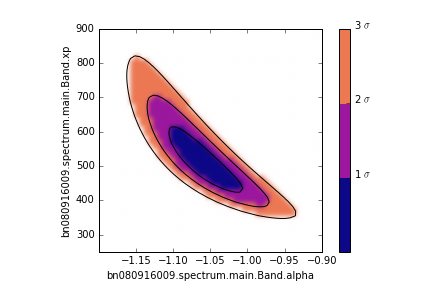

In [16]:
res = jl.get_contours(band.xp,250,900,50,band.alpha,-1.2,-0.9,50)